In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('reviews.csv')
df.sample(5)

,Id,Review,Label
88738,88738,The course offers just a simple running of (in...,2
54642,54642,Can feel Machine Learning !,5
102391,102391,I personally believe this course should be tau...,5
49296,49296,Learning was so easy and lessons were laid out...,5
78791,78791,Superb! Simple yet not simplistic. Nicely and ...,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107018 entries, 0 to 107017
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      107018 non-null  int64 
 1   Review  107018 non-null  object
 2   Label   107018 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


In [4]:
df.Label.value_counts()

5    79173
4    18054
3     5071
1     2469
2     2251
Name: Label, dtype: int64

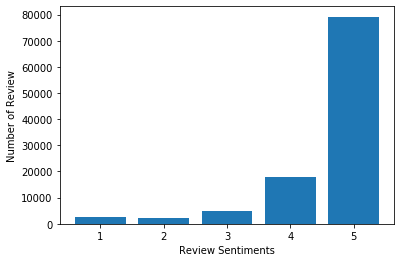

In [5]:
Label_count = df.groupby('Label').count()
plt.bar(Label_count.index.values, Label_count['Review'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [6]:
print(df.iloc[5]['Review'], 'Label - ', df.iloc[5]['Label'])
print('\n')
print(df.iloc[15]['Review'], 'Label - ', df.iloc[15]['Label'])

Great course - I recommend it for all, especially IT and Business Managers! Label -  5


Program demystifies the evolving world of CIOs in a typical global corporation.Coverage being introductory familiarizes participants nicely through some of the nuances & emerging trends.When I took the course participant numbers was fewer, so feedback was quite delayed. So one should plan to be patient to get their peer reviews.Based on peer reviews i sensed much variations in their expectations.Few sections are in French with Subtitles.Subtitle quality requires audit/review. Label -  4


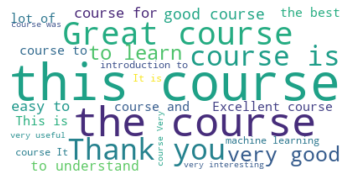

In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
text = " ".join(review for review in df.Review)

wordcloud = WordCloud(max_font_size=80,max_words=25,background_color='white',stopwords=stopwords.words('english')).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [8]:
import re
import math
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup

In [9]:
x_v = []

for i in range(0, 107018):
    clean = re.sub('[a-z A-Z\s]+', '', df['Review'][i])
    clean = clean.lower()
    clean = clean.split()
    clean = ''.join(clean)
    stopwords_en = stopwords.words('english')
    [w for w in re.split('\W+', clean) if not w in stopwords_en]
    x_v.append(clean)

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
vec = MultiLabelBinarizer()

y = df['Label']

In [11]:
xen = vec.fit_transform(x_v)
xen

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
classes = np.unique(y)

def group_by_class(x, y):
        data = dict()
        for c in classes:
            data[c] = x[np.where(y==c)]
        return data

In [13]:
group_by_class(xen, y)

{1: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 3: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 4: array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 5: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [14]:
class MultinomialNavieBayes:
    def __init__(self, classes):
       # self.tokenizer = tokenizer
        self.classes = classes
        
    def group_by_class(self, x, y):
        data = dict()
        for c in self.classes:
            data[c] = x[np.where(y==c)]
        return data
    
    def fit(self, x, y):
        self.n_class_items = {}
        self.log_class_prior = {}
        self.word_counts = {}
        self.vocab = set()
        
        n = len(x)
        
        grouped_data = self.group_by_class(x, y)
        
        for c, data in grouped_data.items():
            self.n_class_items[c] = len(data)
            self.log_class_prior[c] = math.log(self.n_class_items[c] / n)
            self.word_counts[c] = defaultdict(lambda: 0)
            
            for text in data:
                counts = Counter(x_v)
                for word, count in counts.items():
                    if word not in self.vocab:
                        self.vocab.add(word)
                        
                    self.word_counts[c][word] += count
        return self
    
    def laplace_smoothing(self, word, text_class):
        num = self.word_counts[text_class][word] + 1
        denom = self.n_class_items[text_class] + len(self.vocab)
        return math.log(num / denom)
    
    def prediction(self, x):
        result = []
        for text in x:
            class_score = {c: self.log_class_prior[c] for c in self.classes}
            words = set(x_v)
            for word in words:
                if word not in self.vocab: continue
                for c in self.classes:
                    log_w_given_c = self.laplace_smoothing(word, c)
                    class_score[c] += log_w_given_c
                    
            result.append(max(class_score, key=class_score.get))
        return result

In [15]:
x = df['Review'].values
y = df['Label'].values

x_train, x_test, y_train, y_test = train_test_split(xen, y, test_size=0.2, random_state=42)

In [16]:
MNB = MultinomialNavieBayes(classes=np.unique(y)).fit(x_train, y_train)

In [33]:
fold=[[xen], [y]]

train = []
test = []
cross_val={'train': train, 'test': test}
for i, testi in enumerate(fold):
    train.append(fold[:i] + fold[i+1:])
    test.append(testi)
    
print(cross_val)

{'train': [[[array([5, 5, 5, ..., 5, 4, 4], dtype=int64)]], [[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])]]], 'test': [[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])], [array([5, 5, 5, ..., 5, 4, 4], dtype=int64)]]}


In [34]:
y_obs = MNB.prediction(x_test)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

accuracy_score(y_test, y_obs)

0.7419641188562885

In [37]:
print(classification_report(y_test, y_obs))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       493
           2       0.00      0.00      0.00       484
           3       0.00      0.00      0.00       933
           4       0.00      0.00      0.00      3613
           5       0.74      1.00      0.85     15881

    accuracy                           0.74     21404
   macro avg       0.15      0.20      0.17     21404
weighted avg       0.55      0.74      0.63     21404



In [38]:
cnf_matrix = confusion_matrix(y_test, y_obs)
cnf_matrix

array([[    0,     0,     0,     0,   493],
       [    0,     0,     0,     0,   484],
       [    0,     0,     0,     0,   933],
       [    0,     0,     0,     0,  3613],
       [    0,     0,     0,     0, 15881]], dtype=int64)

Text(0.5, 257.44, 'Predicted sentiments')

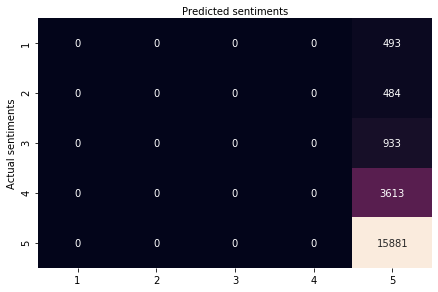

In [39]:
class_names = ['1', '2', '3', '4', '5']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='d', cbar=False,xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiments')
plt.xlabel('Predicted sentiments')

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

NB = MultinomialNB()
NB.fit(x_train, y_train)

cross_validation = cross_val_score(NB, xen, y, cv=5, scoring='accuracy')
print(cross_validation)

[0.73444216 0.73696505 0.73504952 0.73592487 0.73760688]
